<a href="https://colab.research.google.com/github/opmuyes/opmuyes/blob/Assignment/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

import pandas as pd
import torchvision
from torchvision import datasets, models
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
transform = transforms.Compose(
    #  transforms.Augmix(),
    #  transforms.CenterCrop(),
    [transforms.Resize((224,224)),
     transforms.ToTensor(),
     transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])]
)
data_info = pd.read_csv('/content/drive/MyDrive/Monkey/monkey_labels.txt')
train_dir = '/content/drive/MyDrive/Monkey/training'
test_dir = '/content/drive/MyDrive/Monkey/validation'

train_data = datasets.ImageFolder(root=train_dir,
                                  transform = transform)
test_data = datasets.ImageFolder(root=test_dir,
                                  transform = transform)

In [ ]:
# See first training sample
img, label=train_data[0]
img, label

(tensor([[[-0.3369, -0.3883, -0.2513,  ...,  1.5810,  1.4098,  0.4166],
          [-0.3027, -0.3883, -0.3198,  ...,  1.7180,  0.9646,  0.1597],
          [-0.3027, -0.3712, -0.3883,  ...,  1.8037,  1.1700,  0.0741],
          ...,
          [ 1.6838,  1.6153,  1.5468,  ..., -0.7479,  0.2282, -0.5082],
          [ 1.6667,  1.5639,  1.4098,  ..., -0.8678, -0.5767, -0.3712],
          [ 1.5982,  1.4269,  1.2043,  ..., -0.6623, -0.3369, -0.0972]],
 
         [[-0.3025, -0.3200, -0.1625,  ...,  1.9034,  1.6408,  0.4503],
          [-0.2850, -0.3200, -0.2325,  ...,  2.0434,  1.2731,  0.2752],
          [-0.3025, -0.3550, -0.3375,  ...,  2.1310,  1.5532,  0.3102],
          ...,
          [ 1.9909,  1.9209,  1.8333,  ..., -0.8978,  0.0826, -0.7402],
          [ 1.9384,  1.8333,  1.6933,  ..., -1.0553, -0.8102, -0.6702],
          [ 1.8683,  1.6933,  1.4657,  ..., -0.8978, -0.6001, -0.4076]],
 
         [[-0.9853, -0.9853, -0.7587,  ...,  0.6356,  0.3742, -1.0376],
          [-0.9678, -1.0027,

In [ ]:
# class_names = train_data.classes
# class_names
labels = list(data_info['Label'])
class_names = list(data_info[' Common Name                   '])
class_names

[' mantled_howler                ',
 ' patas_monkey                  ',
 ' bald_uakari                   ',
 ' japanese_macaque              ',
 ' pygmy_marmoset                ',
 ' white_headed_capuchin         ',
 ' silvery_marmoset              ',
 ' common_squirrel_monkey        ',
 ' black_headed_night_monkey     ',
 ' nilgiri_langur                ']

In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 5

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch?
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7c06eb0f2fe0>, <torch.utils.data.dataloader.DataLoader object at 0x7c06eb0f2f80>)
Length of train dataloader: 220 batches of 5
Length of test dataloader: 55 batches of 5


In [ ]:
# Check out what's inside the training dataloader
train_imgBatch, train_labelBatch=next(iter(train_dataloader))
train_imgBatch.shape, train_labelBatch.shape

(torch.Size([5, 3, 224, 224]), torch.Size([5]))

In [ ]:
# Create a flatten layer
flatten_layer = nn.Flatten()

#flatten 2D to 1D
input = flatten_layer(train_imgBatch)

input.shape # 3x32x32

torch.Size([5, 150528])

In [ ]:
linear1 = nn.Linear(in_features=150528,out_features=1000) #from 3072 to 1000
linear1_activation = linear1(input)
linear1_activation.shape

torch.Size([5, 1000])

In [ ]:
linear2 = nn.Linear(1000,500) # ambik dari atas,Linear1_activation, bukan input awal
linear2_activation = linear2(linear1_activation)
linear2_activation.shape

torch.Size([5, 500])

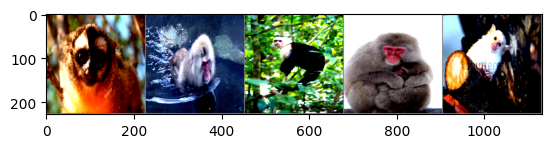

 mantled_howler                  mantled_howler                  mantled_howler                  mantled_howler                  mantled_howler                 

 mantled_howler                  mantled_howler                  mantled_howler                  mantled_howler                  mantled_howler                 

In [ ]:
# Visualize our dataset
def show_image(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# show images
show_image(torchvision.utils.make_grid(images))
# print labels
#print(' '.join('%5s' % class_names[labels[j]] for j in range(5)))
for j in range(5):
    class_name = class_names[labels[j]]
    print(f'{class_name:8}', end=' ')
print('\n')
for j in range(5):
    class_name = class_names[labels[j]]
    print(f'{class_name:8s}', end=' ')

In [ ]:
from torch.utils. data import DataLoader

train_dataloader=DataLoader(train_data,batch_size=4,shuffle=True)        # Size is 4  # To test our image into batches
test_dataloader=DataLoader(test_data,batch_size=4,shuffle=False)

In [ ]:
# # DEFINE OUR MODEL
# class CNNModel(nn.Module):
#   def __init__(self):
#     super(CNNModel,self).__init__()
#     self.conv1 = nn.Conv2d(3,6,5)
#     self.maxpool1 = nn.MaxPool2d(kernel_size=2,stride=2)
#     self.maxpool2 = nn.MaxPool2d(kernel_size=2,stride=2)

#     self.conv2 = nn.Conv2d(6,16,5)

#     self.conv3 = nn.Conv2d(16,20,3)

#     self.fc1 = nn.Linear(5*5*20,100)
#     self.fc2 = nn.Linear(100,10)
#     self.relu = nn.ReLU()
#     self.flatten = nn.Flatten()
#     self.batchnorm1 = nn.BatchNorm2d(6)
#     self.batchnorm2 = nn.BatchNorm2d(16)
#     self.dropout = nn.Dropout(0.4)

#   def forward(self,x):
#     x = self.conv1(x)
#     x = self.relu(x)
#     x = self.batchnorm1(x)
#     x = self.maxpool1(x)

#     x = self.conv2(x)
#     x = self.relu(x)
#     x = self.batchnorm2(x)
#     x = self.maxpool2(x)

#     x = self.conv3(x)
#     x = self.relu(x)
#     x = self.flatten(x)
#     x = self.fc1(x)
#     x = self.dropout(x)
#     x = self.relu(x)
#     out = self.fc2(x)

#     return out
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, stride=1, padding=1)

        # Fully connected layers
        # Assuming 56x56 spatial dimensions after pooling
        self.fc1 = nn.Linear(32 * 56 * 56, 128)
        self.fc2 = nn.Linear(128, 26)  # Adjusted for 26 classes

        # Activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        # Convolutional layers
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))

        # Flatten before fully connected layers
        x = x.view(-1, 32 * 56 * 56)

        # Fully connected layers with ReLU activation
        x = self.relu(self.fc1(x))
        x = self.fc2(x)

        return x

torch.manual_seed(42)

In [ ]:
 model = CNNModel()

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary

summary(model = model)

Layer (type:depth-idx)                   Param #
CNNModel                                 --
├─Conv2d: 1-1                            448
├─MaxPool2d: 1-2                         --
├─Conv2d: 1-3                            4,640
├─Linear: 1-4                            12,845,184
├─Linear: 1-5                            3,354
├─ReLU: 1-6                              --
Total params: 12,853,626
Trainable params: 12,853,626
Non-trainable params: 0

In [ ]:
!pip install torch_optimizer
# import torch.optim.lr_scheduler as lr_scheduler

from torch.optim.lr_scheduler import CosineAnnealingLR

In [ ]:
# # Cross-entropy loss
# loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model.parameters(),lr=0.001,momentum=0.9)

# # Define the optimizer
# optimizer = optim.SGD(model.parameters(), lr=0.1)

# # Define the scheduler
# scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
scheduler = CosineAnnealingLR(optimizer, T_max=200, eta_min=0.0001, last_epoch=-1)


In [ ]:
model.to('cuda')

CNNModel(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=100352, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=26, bias=True)
  (relu): ReLU()
)

In [ ]:
import time
from tqdm.auto import tqdm

def train_and_validate(model, loss_criterion, optimizer, train_dataloader, test_dataloader, epochs=25, device='cuda'):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param train_dataloader: DataLoader for training data
        :param test_dataloader: DataLoader for test/validation data
        :param epochs: Number of epochs (default=25)
        :param device: Device to perform computations ('cuda' or 'cpu')

    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''

    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in tqdm(range(epochs)):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))

        model.train()

        train_loss = 0.0
        train_acc = 0.0

        valid_loss = 0.0
        valid_acc = 0.0

        for i, (inputs, labels) in enumerate(train_dataloader):

            inputs = inputs.to(device)
            labels = labels.to(device)

            # Clean existing gradients
            optimizer.zero_grad()

            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)

            # Compute loss
            loss = loss_criterion(outputs, labels)

            # Backpropagate the gradients
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Update the learning rate
            scheduler.step()

            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)

            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))

            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)

        # Validation - No gradient tracking needed
        with torch.no_grad():

            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(test_dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)


        # Find average training loss and training accuracy
        avg_train_loss = train_loss / len(train_dataloader.dataset)
        avg_train_acc = train_acc / len(train_dataloader.dataset)

        # Find average validation loss and training accuracy
        avg_test_loss = valid_loss / len(test_dataloader.dataset)
        avg_test_acc = valid_acc / len(test_dataloader.dataset)

        history.append([avg_train_loss, avg_test_loss, avg_train_acc, avg_test_acc])

        epoch_end = time.time()

        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc * 100, avg_test_loss, avg_test_acc * 100, epoch_end - epoch_start))

        # Save if the model has best accuracy till now
        if avg_test_acc > best_acc:
            best_acc = avg_test_acc
            best_model = model
            torch.save(best_model, 'best_model.pt')

    return best_model, history



In [ ]:
num_epochs = 10
trained_CNNmodel, history = train_and_validate(model,loss_fn,optimizer,
                                            train_dataloader,test_dataloader,
                                            num_epochs)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1/10
Epoch : 000, Training: Loss: 0.0121, Accuracy: 99.6354%, 
		Validation : Loss : 0.0000, Accuracy: 100.0000%, Time: 48.5397s
Epoch: 2/10
Epoch : 001, Training: Loss: 0.0000, Accuracy: 100.0000%, 
		Validation : Loss : 0.0000, Accuracy: 100.0000%, Time: 38.2627s
Epoch: 3/10
Epoch : 002, Training: Loss: 0.0000, Accuracy: 100.0000%, 
		Validation : Loss : 0.0000, Accuracy: 100.0000%, Time: 39.2706s
Epoch: 4/10
Epoch : 003, Training: Loss: 0.0000, Accuracy: 100.0000%, 
		Validation : Loss : 0.0000, Accuracy: 100.0000%, Time: 37.3674s
Epoch: 5/10
Epoch : 004, Training: Loss: 0.0000, Accuracy: 100.0000%, 
		Validation : Loss : 0.0000, Accuracy: 100.0000%, Time: 38.1985s
Epoch: 6/10
Epoch : 005, Training: Loss: 0.0000, Accuracy: 100.0000%, 
		Validation : Loss : 0.0000, Accuracy: 100.0000%, Time: 37.2194s
Epoch: 7/10
Epoch : 006, Training: Loss: 0.0000, Accuracy: 100.0000%, 
		Validation : Loss : 0.0000, Accuracy: 100.0000%, Time: 38.6742s
Epoch: 8/10
Epoch : 007, Training: Loss: 0

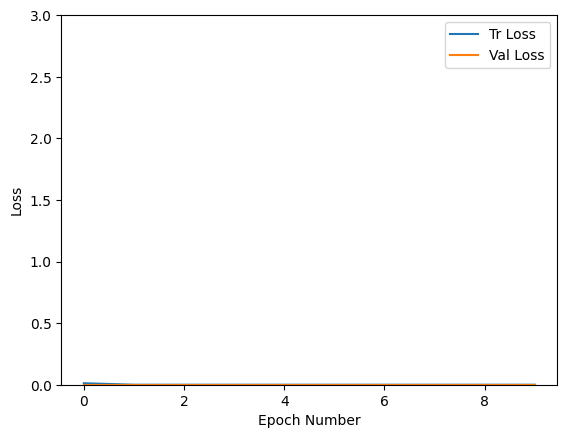

In [ ]:
#Analyze the loss curve

def plot_loss(history):
  history = np.array(history)
  plt.plot(history[:,0:2])
  plt.legend(['Tr Loss', 'Val Loss'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Loss')
  plt.ylim(0,3)
  # plt.savefig('cifar10_loss_curve.png')
  plt.show()

plot_loss(history)

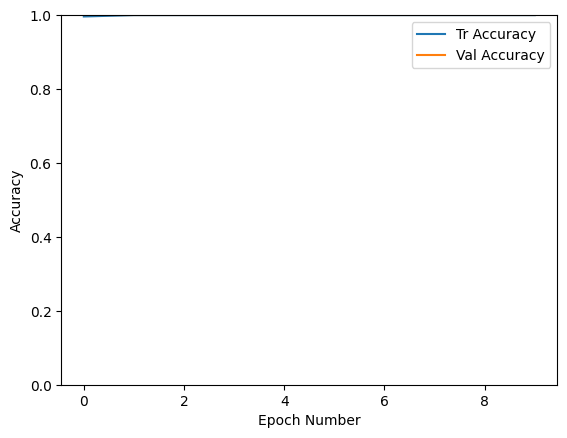

In [ ]:
def plot_accuracy(history):
  history = np.array(history)
  plt.plot(history[:,2:4])
  plt.legend(['Tr Accuracy', 'Val Accuracy'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Accuracy')
  plt.ylim(0,1)
  # plt.savefig('cifar10_accuracy_curve.png')
  plt.show()

plot_accuracy(history)

In [ ]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sn
# import pandas as pd

# def plot_confusionMatrix(model_pretrained, test_dataloader):

#   y_pred = []
#   y_true = []

#   model.to('cpu')

#   # iterate over test data
#   for inputs, labels in test_dataloader:
#           output = model(inputs) # Feed Network

#           output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
#           y_pred.extend(output) # Save Prediction

#           labels = labels.data.cpu().numpy()
#           y_true.extend(labels) # Save Truth

#   # Build confusion matrix
#   cf_matrix = confusion_matrix(y_true, y_pred)
#   df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in class_names],
#                       columns = [i for i in class_names])
#   plt.figure(figsize = (20,10))
#   sn.heatmap(df_cm, annot=True)
#   # plt.savefig('output.png')

# plot_confusionMatrix(model, test_dataloader)